In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Datavisualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.figure_factory as ff
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# GOAL OF THE NOTEBOOK
Predict sales prices and practice feature engineering, RFs, and gradient boosting

### File descriptions
train.csv - the training set
test.csv - the test set
data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

### Data fields
**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
**MSSubClass**: The building class
**MSZoning**: The general zoning classification
**LotFrontage**: Linear feet of street connected to property
**LotArea**: Lot size in square feet
**Street**: Type of road access
**Alley**: Type of alley access
**LotShape**: General shape of property
**LandContour**: Flatness of the property
**Utilities**: Type of utilities available
**LotConfig**: Lot configuration
**LandSlope**: Slope of property
**Neighborhood**: Physical locations within Ames city limits
**Condition1**: Proximity to main road or railroad
**Condition2**: Proximity to main road or railroad (if a second is present)
**BldgType**: Type of dwelling
**HouseStyle**: Style of dwelling
**OverallQual**: Overall material and finish quality
**OverallCond**: Overall condition rating
**YearBuilt**: Original construction date
**YearRemodAdd**: Remodel date
**RoofStyle**: Type of roof
**RoofMatl**: Roof material
**Exterior1st**: Exterior covering on house
**Exterior2nd**: Exterior covering on house (if more than one material)
**MasVnrType**: Masonry veneer type
**MasVnrArea**: Masonry veneer area in square feet
**ExterQual**: Exterior material quality
**ExterCond**: Present condition of the material on the exterior
**Foundation**: Type of foundation
**BsmtQual**: Height of the basement
**BsmtCond**: General condition of the basement
**BsmtExposure**: Walkout or garden level basement walls
**BsmtFinType1**: Quality of basement finished area
**BsmtFinSF1**: Type 1 finished square feet
**BsmtFinType2**: Quality of second finished area (if present)
**BsmtFinSF2**: Type 2 finished square feet
**BsmtUnfSF**: Unfinished square feet of basement area
**TotalBsmtSF**: Total square feet of basement area
**Heating**: Type of heating
**HeatingQC**: Heating quality and condition
**CentralAir**: Central air conditioning
**Electrical**: Electrical system
**1stFlrSF**: First Floor square feet
**2ndFlrSF**: Second floor square feet
**LowQualFinSF**: Low quality finished square feet (all floors)
**GrLivArea**: Above grade (ground) living area square feet
**BsmtFullBath**: Basement full bathrooms
**BsmtHalfBath**: Basement half bathrooms
**FullBath**: Full bathrooms above grade
**HalfBath**: Half baths above grade
**Bedroom**: Number of bedrooms above basement level
**Kitchen**: Number of kitchens
**KitchenQual**: Kitchen quality
**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
**Functional**: Home functionality rating
**Fireplaces**: Number of fireplaces
**FireplaceQu**: Fireplace quality
**GarageType**: Garage location
**GarageYrBlt**: Year garage was built
**GarageFinish**: Interior finish of the garage
**GarageCars**: Size of garage in car capacity
**GarageArea**: Size of garage in square feet
**GarageQual**: Garage quality
**GarageCond**: Garage condition
**PavedDrive**: Paved driveway
**WoodDeckSF**: Wood deck area in square feet
**OpenPorchSF**: Open porch area in square feet
**EnclosedPorch**: Enclosed porch area in square feet
**3SsnPorch**: Three season porch area in square feet
**ScreenPorch**: Screen porch area in square feet
**PoolArea**: Pool area in square feet
**PoolQC**: Pool quality
**Fence**: Fence quality
**MiscFeature**: Miscellaneous feature not covered in other categories
**MiscVal**: Value of miscellaneous feature
**MoSold**: Month Sold
**YrSold**: Year Sold
**SaleType**: Type of sale
**SaleCondition**: Condition of sale



# I - BASIC EDA

In [4]:
# Load all the data
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
df_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [9]:
# Take a look of the shape
print(f'Train shape : {df_train.shape}')
print(f'Test shape : {df_test.shape}')
print(f'Submission shape : {df_submission.shape}')

Train shape : (1460, 81)
Test shape : (1459, 80)
Submission shape : (1459, 2)


In [13]:
# Configuration to see all features
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [14]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [16]:
df_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


### First Step : We will concat the Train and Test set
    - 1 : combine df_test + df_submissions
    - 2 : Merge df_train + df _test

In [23]:
# Combine df_test + df_submisision
df_test_full = pd.merge(df_test,df_submission, how = 'inner')
df_test_full.shape

(1459, 81)

In [24]:
# Concat df_train + df_test_full
data = pd.concat([df_train,df_test_full], axis=0)
data.shape

(2919, 81)

In [25]:
#Copy the dataset for secure
df = data.copy()

### First Look on your Data

#### CHECKLIST :

##### Shape Analysis :
- target variable : **'SalePrice'**
- shape of your dataset : **row : 2919, columns : 81**
- Features types : **float64(12), int64(26), object(43)**
- Missing Values analysis : We have a lot of variables with NaN 
    - 1 **group : > 80% NaN**
            - PoolQC	99.657417
            - MiscFeature	96.402878
            - Alley	93.216855
            - Fence	80.438506
     - **2 group : >15 % <50%**
            - FireplaceQu	48.646797
            - LotFrontage	16.649538
     - **3 group : Garage Option**
            - GarageFinish	5.447071
            - GarageQual	5.447071
            - GarageCond	5.447071
            - GarageYrBlt	5.447071
            - GarageType	5.378554
     - **4 group : < 3%**
            - BsmtExposure	2.809181
            - BsmtCond	2.809181
            - BsmtQual	2.774923
            - BsmtFinType2	2.740665
            - BsmtFinType1	2.706406
     - **5 group :**
            - MasVnrType	0.822199
            - MasVnrArea	0.787941
            - MSZoning	0.137033
      - **6 group : Condtion Optional**
            - Functional	0.068517
            - Utilities	0.068517
            - BsmtHalfBath	0.068517
            - BsmtFullBath	0.068517
      - **7 group : Condition Optimal**
            - GarageArea	0.034258
            - BsmtFinSF1	0.034258
            - SaleType	0.034258
            - GarageCars	0.034258
            - BsmtUnfSF	0.034258
            - Electrical	0.034258
            - Exterior2nd	0.034258
            - Exterior1st	0.034258
            - KitchenQual	0.034258
            - TotalBsmtSF	0.034258
            - BsmtFinSF2	0.034258

#### Background analysis :
- Target visualization :
- Meaning of variables :
- relationship Variables / Target :

#### More detailled analysis
- relationship Variables / Variables :
    -
    -
    -
- Missing Values analysis : 
- hypothesis (H0):
  - ???

In [35]:
# Take a look on the differents variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

<AxesSubplot:ylabel='None'>

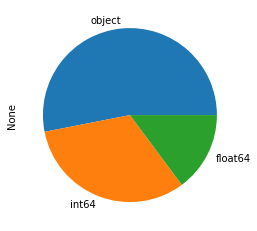

In [66]:
# Type representation
df.dtypes.value_counts().plot.pie()

In [37]:
#finding the unique values in each column
for col in df.columns:
    print('We have {} unique values in {} column'.format(len(df[col].unique()),col))
    print('__'*30)

We have 2919 unique values in Id column
____________________________________________________________
We have 16 unique values in MSSubClass column
____________________________________________________________
We have 6 unique values in MSZoning column
____________________________________________________________
We have 129 unique values in LotFrontage column
____________________________________________________________
We have 1951 unique values in LotArea column
____________________________________________________________
We have 2 unique values in Street column
____________________________________________________________
We have 3 unique values in Alley column
____________________________________________________________
We have 4 unique values in LotShape column
____________________________________________________________
We have 4 unique values in LandContour column
____________________________________________________________
We have 3 unique values in Utilities column
_______________

In [38]:
#describe our data
df[df.select_dtypes(exclude='object').columns].drop('Id',axis=1).describe().\
style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180052.854647
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,57381.565721
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154795.084126
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176734.841494
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191895.744157
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [55]:
#find the null values in each column
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False).to_frame().rename(columns={0:'Null values'})

,Null values
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


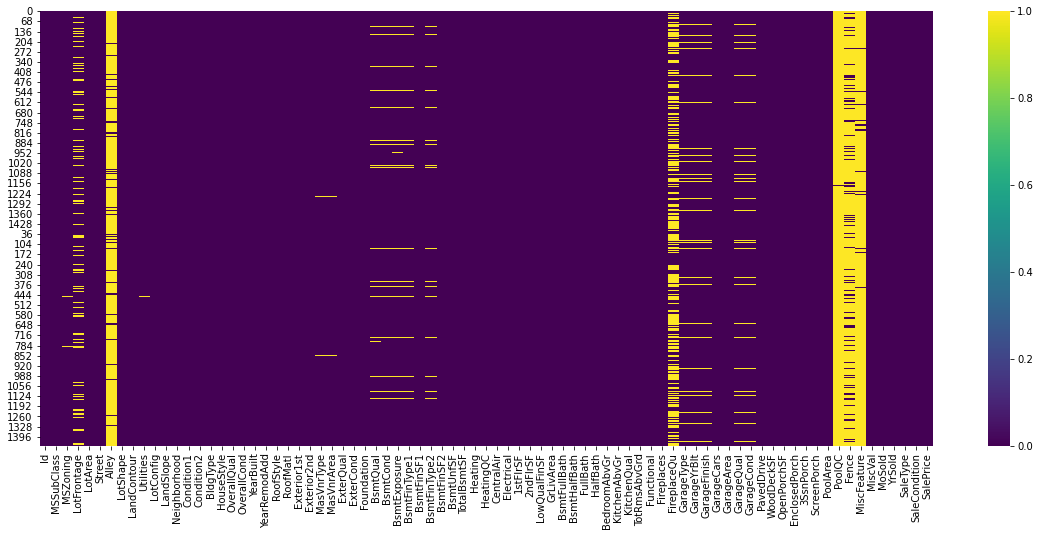

In [64]:
#visuaize the null values in each column
plt.figure(figsize=(20,8));
sns.heatmap(df.isnull(), cmap='viridis');

In [67]:
#lets see the correlation between columns and target column
corr = df.corr()
corr['SalePrice'].sort_values(ascending=False)[1:].to_frame()\
.style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,SalePrice
GrLivArea,0.588010
OverallQual,0.550911
TotRmsAbvGrd,0.469800
GarageCars,0.469249
GarageArea,0.464809
1stFlrSF,0.462865
TotalBsmtSF,0.453224
FullBath,0.433710
YearBuilt,0.362066
MasVnrArea,0.355608


In [68]:
#lets take a look to the shape of columns
df.skew().to_frame().rename(columns={0:'Skewness'}).sort_values('Skewness')

,Skewness
YearBuilt,-0.600114
YearRemodAdd,-0.451252
GarageYrBlt,-0.382150
GarageCars,-0.218373
Id,0.000000
YrSold,0.132467
FullBath,0.167692
MoSold,0.195985
OverallQual,0.197212
GarageArea,0.241301


In [85]:
liste_skewness = ['MasVnrArea','BsmtHalfBath','ScreenPorch',
                  'EnclosedPorch','BsmtFinSF2','KitchenAbvGr','3SsnPorch','LowQualFinSF',
                  'LotArea','PoolArea','MiscVal']

### First Conclusion :

- A lot of NaN Values mostly on : 

      - PoolQC    99.657417
      - MiscFeature    96.402878
      - Alley    93.216855
      - Fence    80.438506
      
- SalePrice get a high correlation mostly with :  

    - GrLivArea	0.588010
    - OverallQual	0.550911
    - TotRmsAbvGrd	0.469800
    - GarageCars	0.469249
    - GarageArea	0.464809
    - 1stFlrSF	0.462865
    - TotalBsmtSF	0.453224
    - FullBath	0.433710
    - YearBuilt	0.362066
    - MasVnrArea	0.355608
    - Fireplaces	0.353567
    - YearRemodAdd	0.350032
    - GarageYrBlt	0.325297
    - LotFrontage	0.318084
    - LotArea	0.296497
    
- We got a high skewness with :  

    - 3SsnPorch	11.381914
    - LowQualFinSF	12.094977
    - LotArea	12.829025
    - PoolArea	16.907017
    - MiscVal	21.958480


### Take a look on your target

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

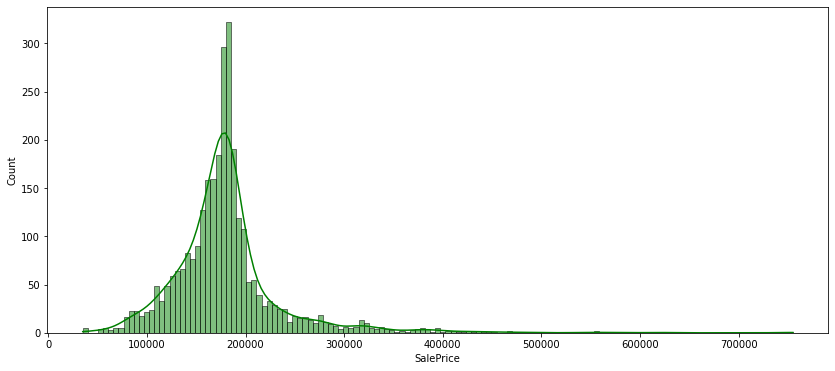

In [127]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x="SalePrice", kde=True, color='green')

### Background ANALYSIS 

 ##### 1 - TARGET / TARGET : Numerical Variables

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

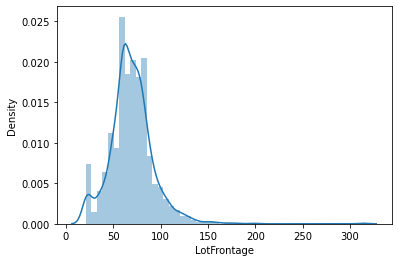

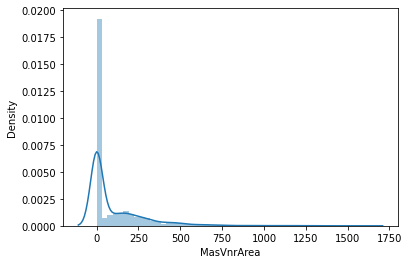

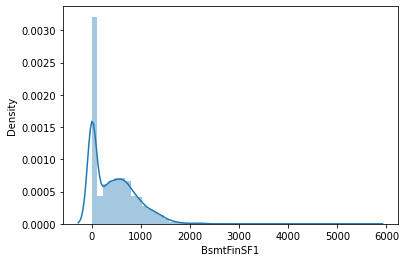

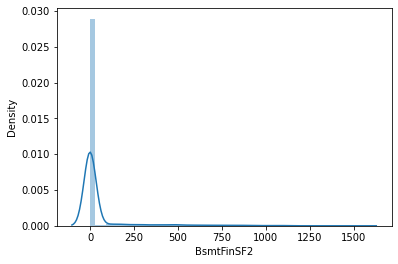

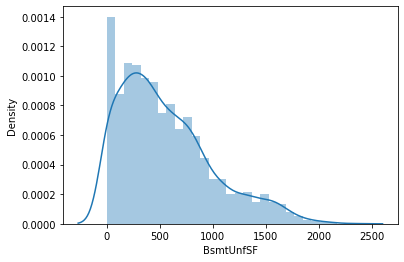

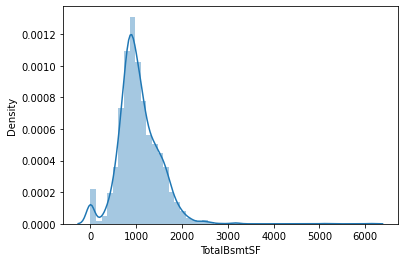

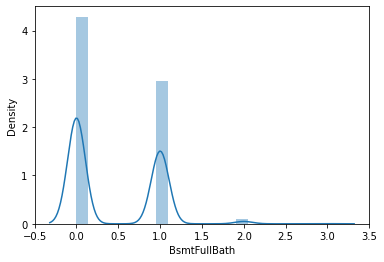

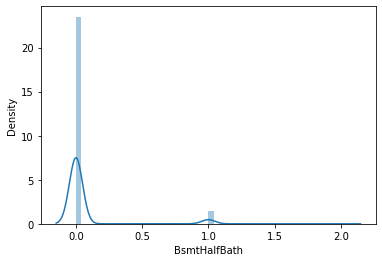

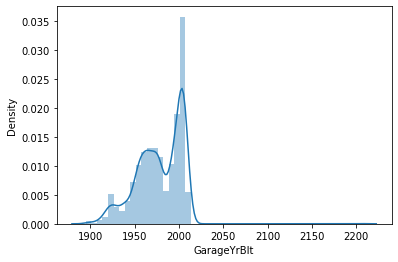

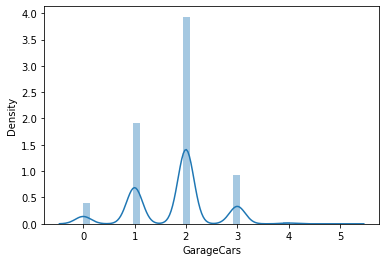

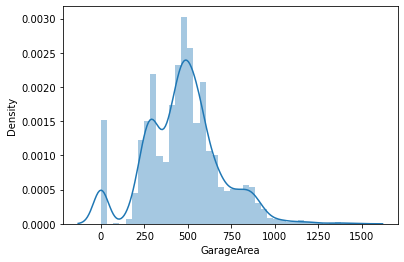

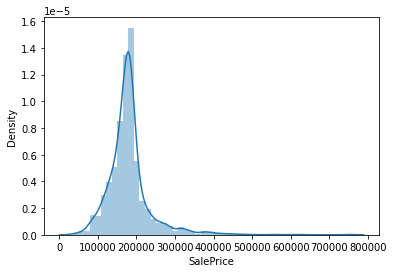

In [130]:
# Take a look on the numerical distributions
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

 ##### 2 - TARGET / TARGET : Categorical Variables

In [138]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

MSZoning------------------------------------------ ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Street-------------------------------------------- ['Pave' 'Grvl']
Alley--------------------------------------------- [nan 'Grvl' 'Pave']
LotShape------------------------------------------ ['Reg' 'IR1' 'IR2' 'IR3']
LandContour--------------------------------------- ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities----------------------------------------- ['AllPub' 'NoSeWa' nan]
LotConfig----------------------------------------- ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope----------------------------------------- ['Gtl' 'Mod' 'Sev']
Neighborhood-------------------------------------- ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1---------------------------------------- ['Norm' 'Feedr' 'PosN' 'Artery' 'R